In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import matplotlib.gridspec as gridspec
import itertools
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate


# DATASET
The dataset below has been explained in earlier notebooks and is being used here to carry on the data. 

In [18]:
contraceptive_data = pd.read_csv("contraceptive_method_dataset.csv", 
                                 encoding = "ISO-8859-1", engine='python')
X = contraceptive_data.drop('children', axis=1).copy()
contraceptive_data['predictor_population']= pd.cut(contraceptive_data['children'],
                                       [-1,2,16], labels=[0,1])
contraceptive_data['predictor_population_i']= contraceptive_data['predictor_population'].astype(int)
y= contraceptive_data['predictor_population_i']

# Data Preparation
## Train Test Split Data
Train Test Split was implemented using Sklearn Model Selection. The default size of 70% was used for the training data.


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 24, stratify = y )

In [20]:
X.shape

(1473, 9)

In [21]:
X_train.shape

(1031, 9)

In [22]:
X_test.shape

(442, 9)

In [23]:
np.unique(y_train, return_counts= True)

(array([0, 1]), array([454, 577], dtype=int64))

In [24]:
np.unique(y_test, return_counts= True)

(array([0, 1]), array([195, 247], dtype=int64))

In [25]:
print("Ratio for the y_train (less than 2 children): ", 454/(454+577))
print("Ratio for the y_test (less than 2 children): ", 195/(195+247))

Ratio for the y_train (less than 2 children):  0.44034917555771097
Ratio for the y_test (less than 2 children):  0.4411764705882353


_Notes_
- The variable X has a total of 1473 instances and 9 attributes. It has been split to training data of 1031 and test data for 442.
- Numpy was used to check the uniqueness of the y training data. There are 2 binary variables, 0 and 1 which uses 1031 instances
- The ratio for the y_train and Y_test data for less than 2 children is very close. Both are around 44%. The 44% ratio of before and after the data train test split are the same as in the previous notebook (CM_Exploration Data Analysis 2) 

# Standard Data Scaling

In [26]:
#Using sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [27]:
#Training mean and std was calculated and was used in the transformation.
std_scaler.fit(X_train)
X_train_scaled = std_scaler.transform(X_train)

## Never fit onto Test data!! Only Transform
X_test_scaled  = std_scaler.transform(X_test)

In [28]:
print(X_train_scaled)
print(X_test_scaled)

[[-0.18981854  1.03250129 -1.70593277 ... -0.12376157 -0.2860888
   0.08960221]
 [-2.02797989  0.06123411  0.69518216 ... -0.12376157 -0.2860888
  -1.0508901 ]
 [ 1.77088691  1.03250129  0.69518216 ...  0.88094853 -0.2860888
   0.08960221]
 ...
 [ 1.15816646  1.03250129  0.69518216 ...  0.88094853 -0.2860888
   0.08960221]
 [-0.80253899  1.03250129  0.69518216 ... -0.12376157 -0.2860888
  -1.0508901 ]
 [ 1.77088691 -1.88130026 -2.90649024 ... -1.12847167 -0.2860888
  -1.0508901 ]]
[[-1.66034762 -0.91003307 -0.50537531 ... -1.12847167 -0.2860888
  -1.0508901 ]
 [-1.41525944 -0.91003307 -1.70593277 ... -1.12847167 -0.2860888
   0.08960221]
 [ 0.05526964  0.06123411 -0.50537531 ... -0.12376157 -0.2860888
   1.23009452]
 ...
 [-1.53780353  0.06123411  0.69518216 ... -1.12847167 -0.2860888
  -1.0508901 ]
 [-0.80253899 -0.91003307  0.69518216 ... -0.12376157 -0.2860888
   0.08960221]
 [-1.04762717 -0.91003307 -0.50537531 ... -0.12376157 -0.2860888
  -1.0508901 ]]


# Plotting the Logistic Regression Chart

In [29]:
#Initializing Classifications
logreg = LogisticRegression(penalty = 'none', random_state=1)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(penalty='none', random_state=1)

## Principal Component Analysis (PCA)
Principal Component Analysis was used in this chart because PCA reduces multi-dimensional data to two dimension data. The X-train was instantiate to fit and transform

C:\Users\Marissa\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


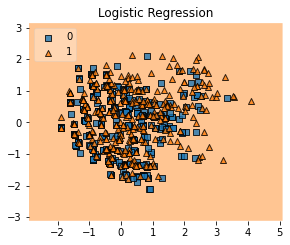

In [30]:
clf1 = LogisticRegression(random_state=1, solver='lbfgs')
xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))

X_train = np.array(X_train_scaled, dtype=np.int64)
y_train = np.array(y_train, dtype=np.int64)
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(X_train)
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(10,8))

labels = ['Logistic Regression']
for clf, lab, grd in zip([clf1],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train2, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X= X_train2, y= y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

_Notes_
- Above is logistic-regression classifiers decision boundaries on the first two dimensions of the contraceptive dataset. The datapoints are colored according to their labels. The blue labels for 0 represents number of children equal or less than two while the biege labels for 1 represents number of children greater than two. The background is only biege and has no partition from the other label. 

